<a href="https://colab.research.google.com/github/AkramMaouche/Neural-Networks/blob/main/ANN_exemple_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [7]:
data= tf.keras.datasets.fashion_mnist

In [8]:
(train_images, train_labels),(test_images,test_labels)=data.load_data()

T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


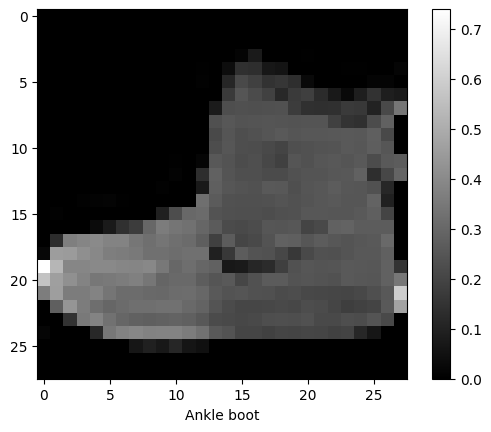

In [15]:
plt.figure()
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[0]])
plt.show()

*Training the dataset*

In [13]:
train_images= tf.keras.utils.normalize(train_images,axis=1)
test_images= tf.keras.utils.normalize(test_images,axis=1)

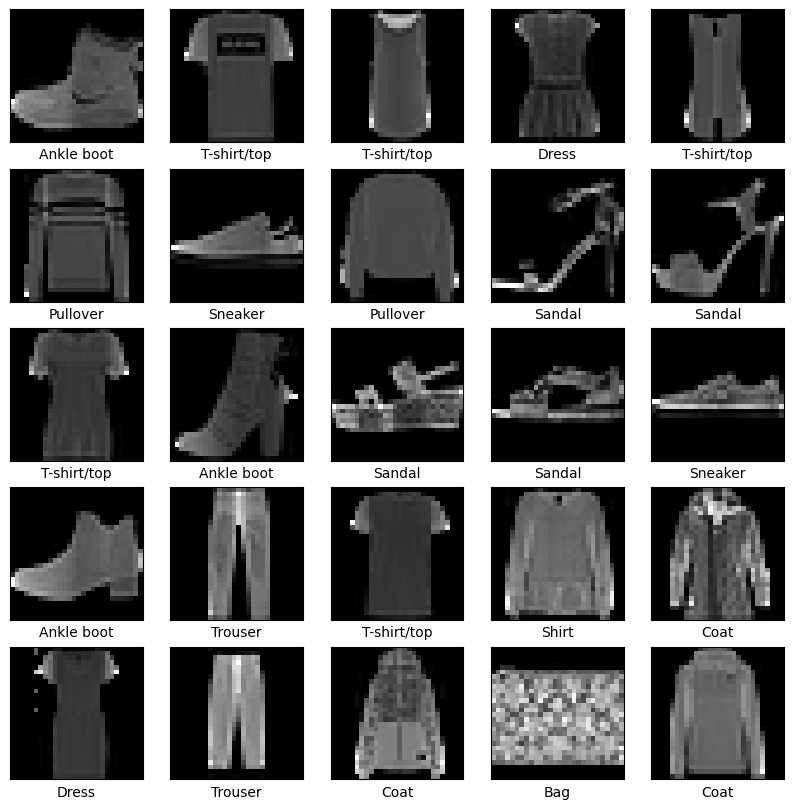

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap='gray')
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# Define The ANN

In [23]:
model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
]

)

In [24]:
model.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [27]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8974 - loss: 0.2723
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9042 - loss: 0.2559
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9069 - loss: 0.2489
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9094 - loss: 0.2409
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9158 - loss: 0.2256
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9186 - loss: 0.2142
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9205 - loss: 0.2088
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9237 - loss: 0.2006
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9244 - loss: 0.1989
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9279 - loss: 0.1889


In [28]:
test_loos,test_acc = model.evaluate(test_images,test_labels)
print("Tested Acc: ",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8863 - loss: 0.3358
Tested Acc:  0.8860999941825867


In [29]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[2.3069229e-09 3.6527833e-18 2.3746552e-10 1.6016991e-10 1.9193707e-11
 2.2769244e-05 5.2686469e-09 1.8856475e-03 1.0655802e-07 9.9809134e-01]


In [32]:
import numpy as np
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9
